# **TASK**
## **Perform an EDA on the given dataset.**
## **Draw some conclusions from the dataset.** 

## **IMPORTING REQUIRED LIBRARIES**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **DATA PREPROCESSING**

### **LOADING DATA**

In [6]:
data = pd.read_csv("/content/fifa.csv")

In [7]:
data.shape

(18207, 18)

### **LISTING THE COLUMNS**

In [8]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

### **FIRST & LAST 5 ROWS**

In [9]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [10]:
data.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,CM,2018,2019-01-01,5.833333,176.0,165.0


### **MANAGING NULL VALUES**

In [11]:
data = data.drop("ID",axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     17955 non-null  float64
 7   Wage                      18207 non-null  float64
 8   Preferred Foot            18207 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Skill Moves               18159 non-null  float64
 11  Position                  18207 non-null  object 
 12  Joined                    18207 non-null  int64  
 13  Contract Valid Until      17918 non-null  object 
 14  Height

In [13]:
data["Club"] = data["Club"].fillna("Not Available")
data["Value"] = data["Value"].fillna(round(data["Value"].mean()))
data["International Reputation"] = data["International Reputation"].fillna(round(data["International Reputation"].mean()))
data["Skill Moves"] = data["Skill Moves"].fillna(round(data["Skill Moves"].mean()))
data["Contract Valid Until"] = data["Contract Valid Until"].fillna(data["Contract Valid Until"].mode()[0])

In [14]:
data.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

### **DESCRIPTION OF DATA**

In [15]:
data.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,2444.536717,9.731312,1.112924,2.360356,2016.420607,5.946771,165.979129,4585.060971
std,4.669943,6.908930,6.136496,5587.638395,21.999290,0.393554,0.755394,2.018194,0.220514,15.572775,10630.414430
min,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,28.000000,71.000000,75.000000,2200.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


### **UNIQUE VALUES**

In [16]:
data.nunique()

Name                        17194
Age                            29
Nationality                   164
Overall                        48
Potential                      47
Club                          652
Value                         217
Wage                          144
Preferred Foot                  2
International Reputation        5
Skill Moves                     5
Position                       27
Joined                         22
Contract Valid Until           35
Height                         22
Weight                         58
Release Clause               1245
dtype: int64

# **EDA**

### **PAIR PLOT**

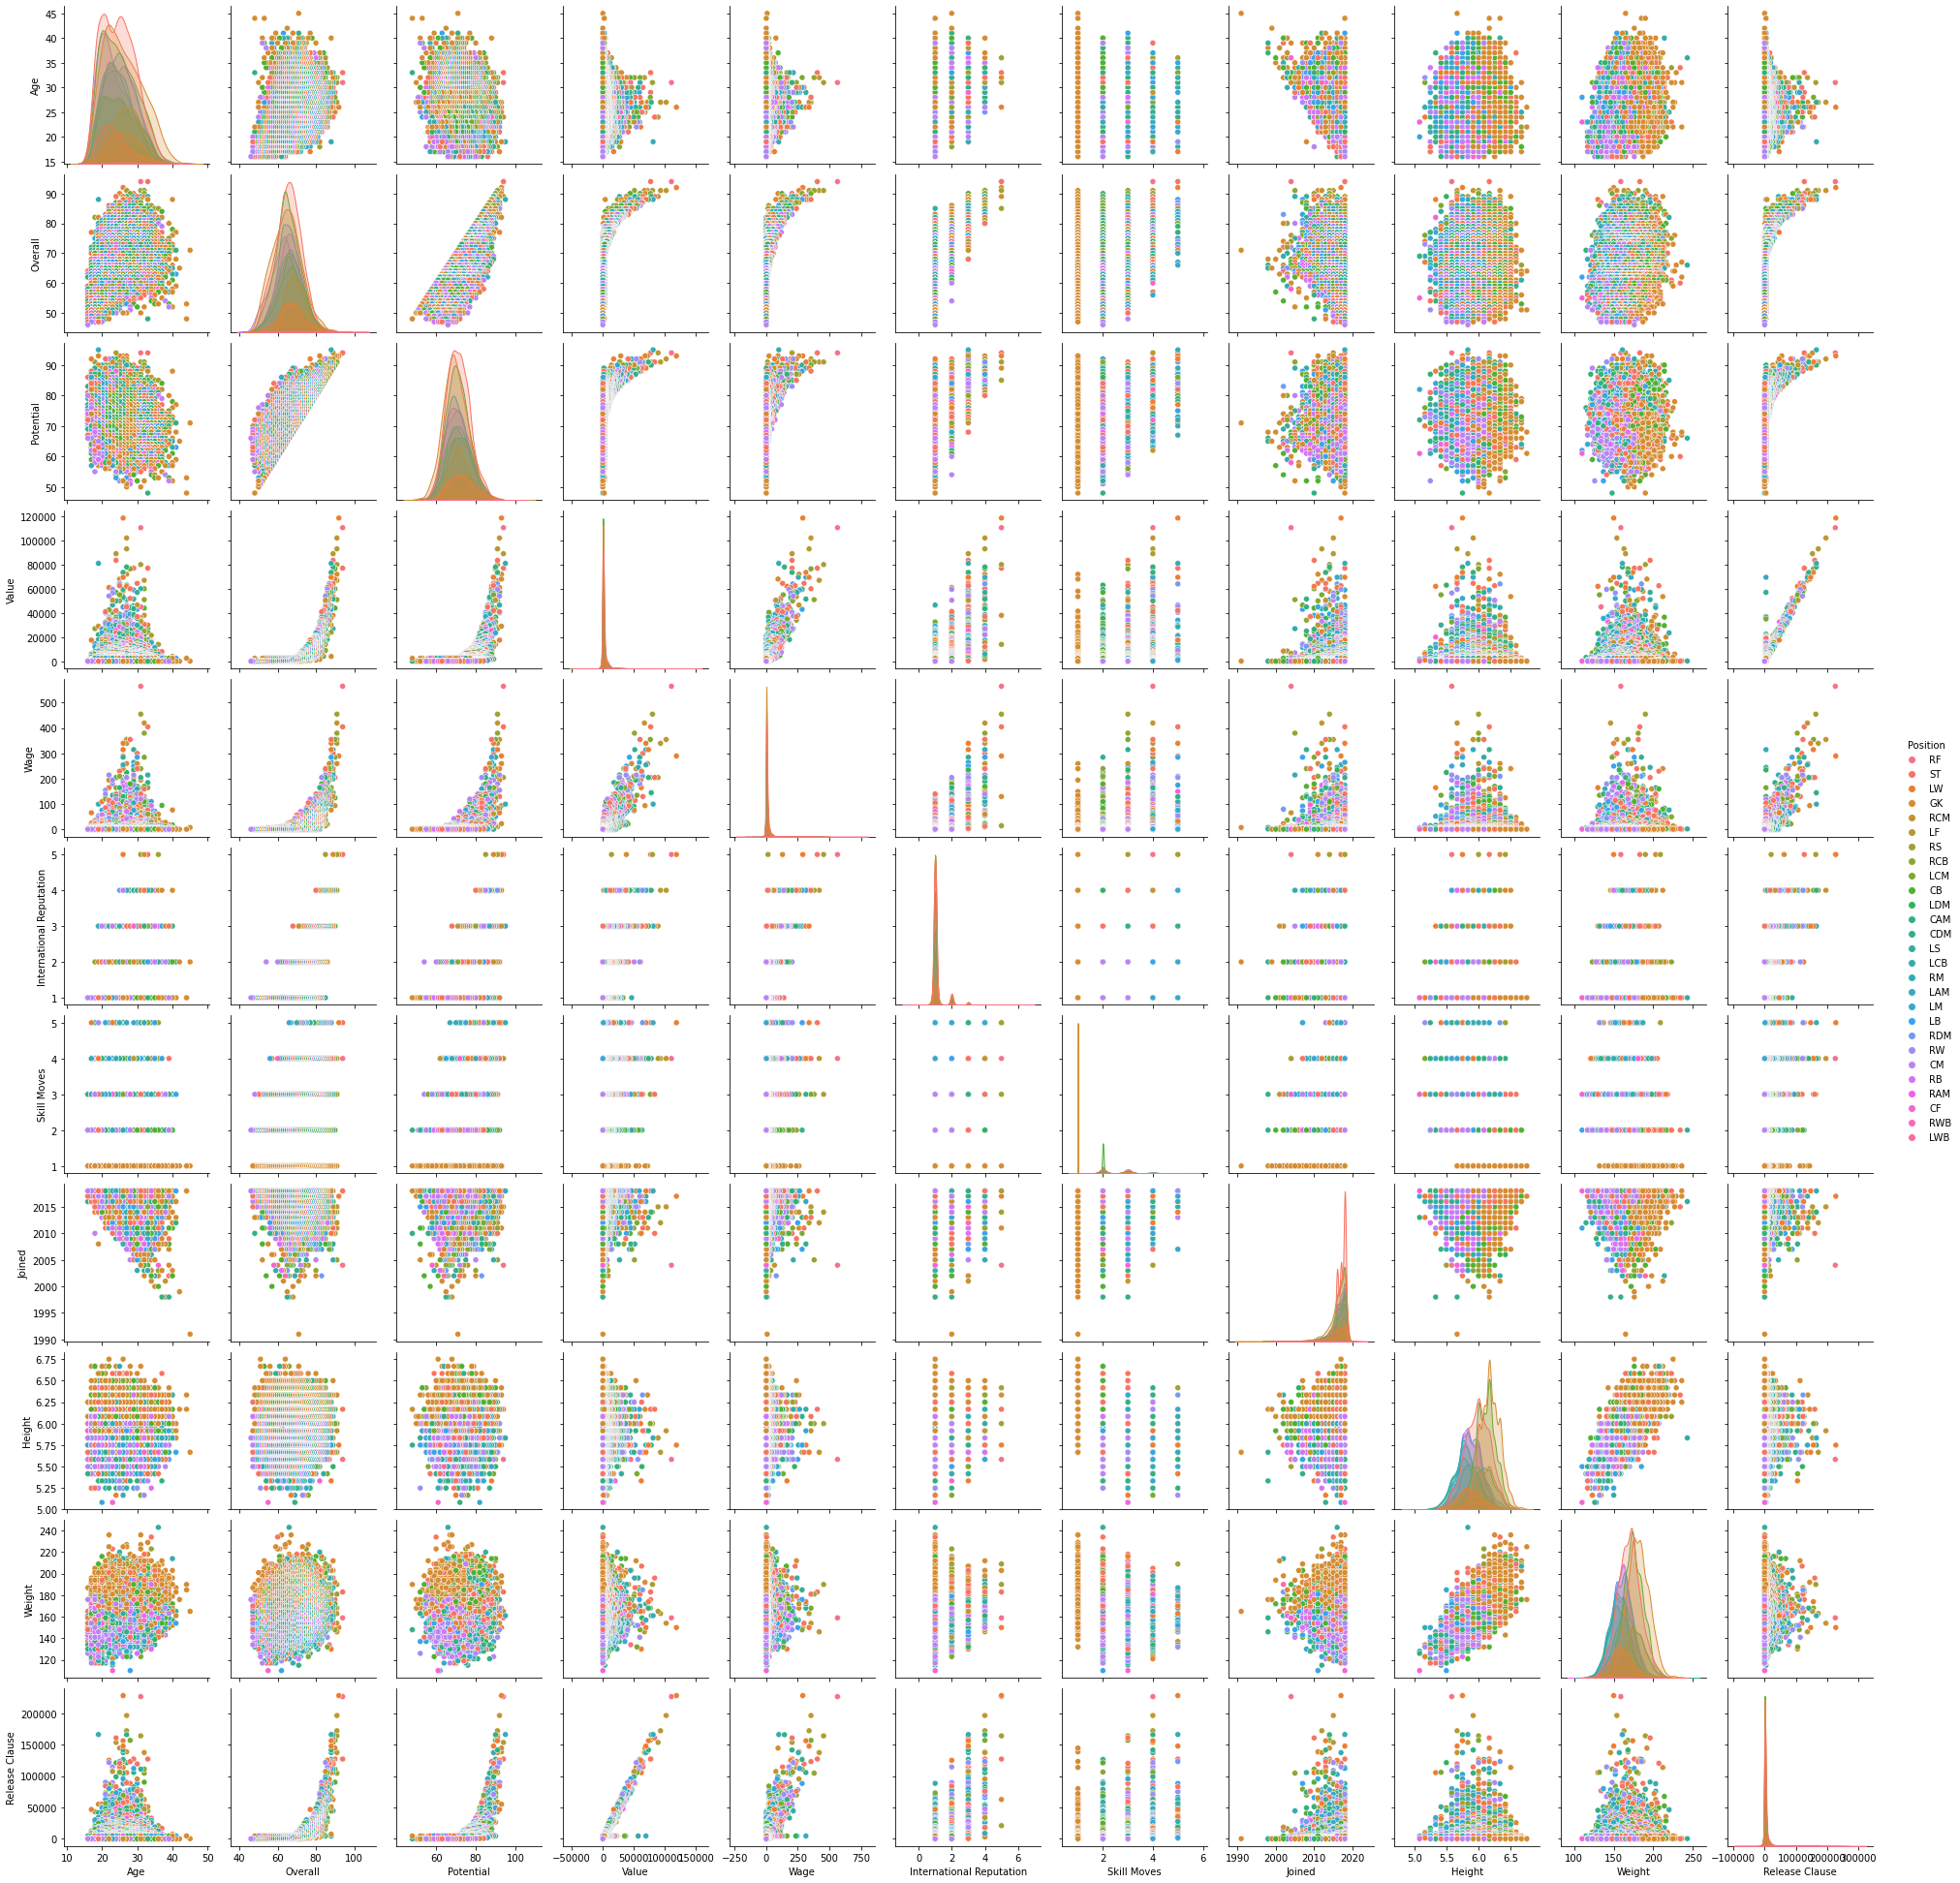

In [25]:
sns.pairplot(data=data,hue="Position")

### **CORRELATION OF DATA**

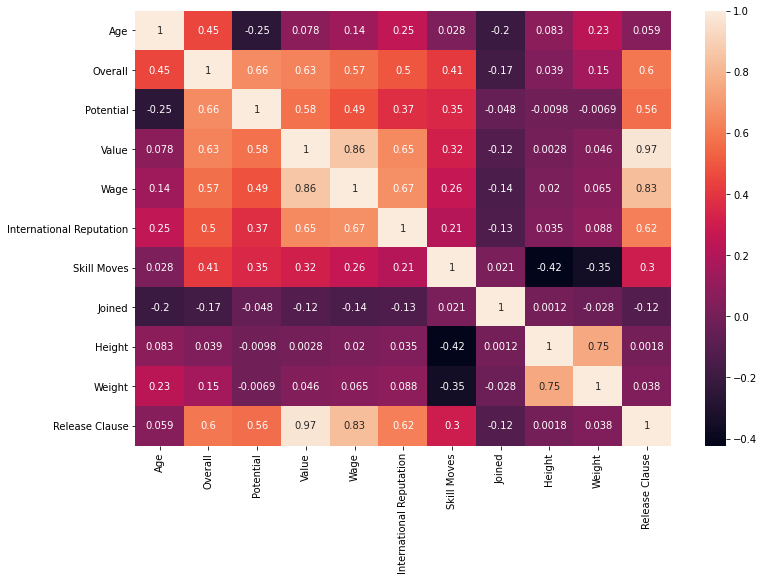

In [78]:
fig,ax = plt.subplots(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr,annot=True,ax=ax)

**THERE IS A MODERATE POSITIVE CORRELATION BETWEEN WAGE & OVERALL,POTENTIAL RATING.**


**THERE IS A POSITIVE CORRELATION BETWEEN POTENTIAL & OVERALL RATINGS.**


**THE HEIGHT & WEIGHT OF A PLAYER DOES NOT AFFECT WAGE THAT MUCH.**


**THERE IS A SMALL NEGATIVE CORRELATION BETWEEN POTENTIAL & AGE i.e WITH AGING THE POTENTIAL SLIGHTLY DECREASES**


**THE PLAYER WITH HIGH VALUE WILL HAVE HIGHER WAGE & RELEASE CLAUSE**


### **TOP COUNTRIES BY PLAYERS**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

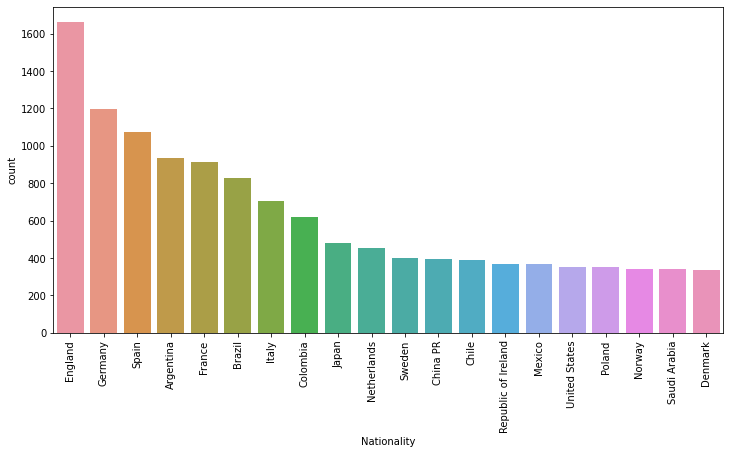

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Nationality', data=data, order=data['Nationality'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)

**ENGLAND HAS MAXIMUM NO OF PLAYERS**

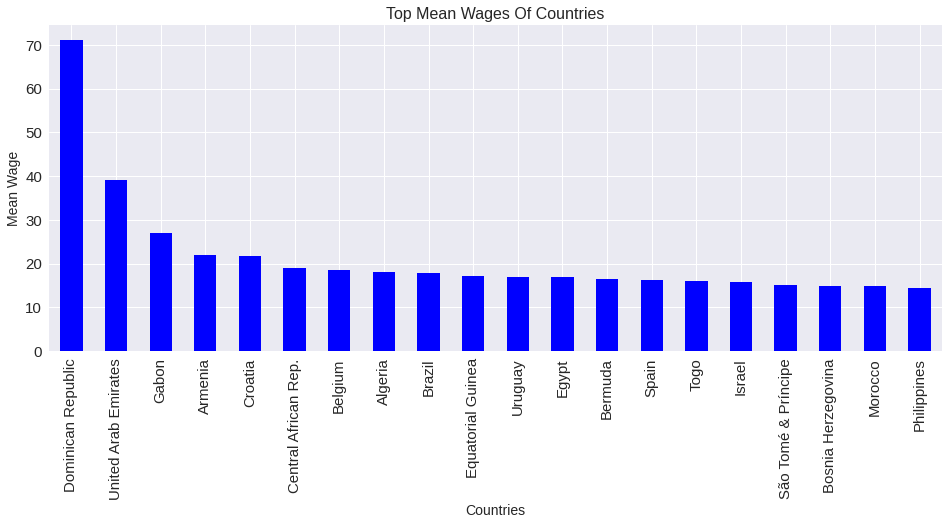

In [152]:
top_countries = data.groupby(["Nationality"]).Wage.mean().nlargest(20)
plt.style.use('seaborn')
plt.figure(figsize=(16,6))
top_countries.plot(kind="bar",fontsize = 15,color=["blue"])
plt.xlabel("Countries",size=14)
plt.ylabel("Mean Wage",size=14)
plt.title("Top Mean Wages Of Countries",size=16)
plt.show()

### **TOP CLUBS BY PLAYERS**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

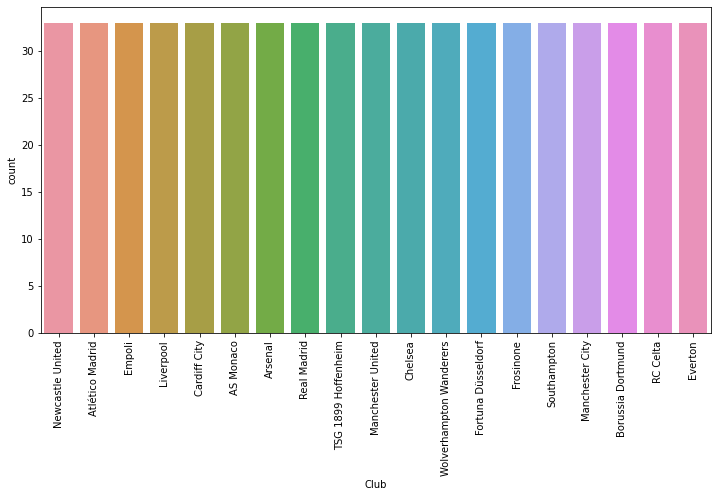

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Club', data=data, order=data['Club'].value_counts().iloc[1:20].index)
plt.xticks(rotation=90)

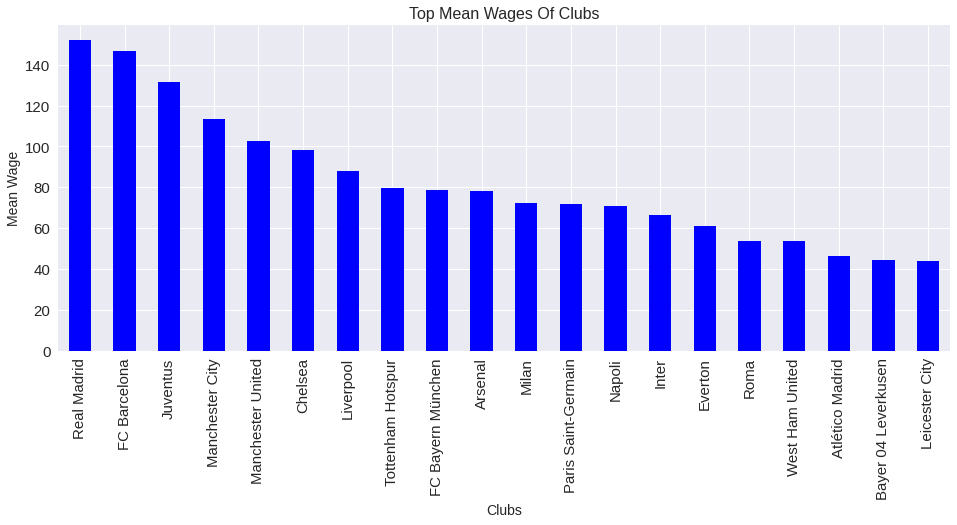

In [154]:
top_clubs = data.groupby(["Club"]).Wage.mean().nlargest(20)
plt.style.use('seaborn')
plt.figure(figsize=(16,6))
top_clubs.plot(kind="bar",fontsize = 15,color=["blue"])
plt.xlabel("Clubs",size=14)
plt.ylabel("Mean Wage",size=14)
plt.title("Top Mean Wages Of Clubs",size=16)
plt.show()

**PLAYERS OF REAL MADRID AND FC BARCELONA ARE GETTING PAID MORE.**

### **ANALYSIS BY OVERALL RATING**

In [95]:
data.nlargest(10, 'Overall')[["Name","Age","Club","Overall","Potential","Wage"]]

,Name,Age,Club,Overall,Potential,Wage
0,L. Messi,31,FC Barcelona,94,94,565.0
1,Cristiano Ronaldo,33,Juventus,94,94,405.0
2,Neymar Jr,26,Paris Saint-Germain,92,93,290.0
3,De Gea,27,Manchester United,91,93,260.0
4,K. De Bruyne,27,Manchester City,91,92,355.0
5,E. Hazard,27,Chelsea,91,91,340.0
6,L. Modrić,32,Real Madrid,91,91,420.0
7,L. Suárez,31,FC Barcelona,91,91,455.0
8,Sergio Ramos,32,Real Madrid,91,91,380.0
9,J. Oblak,25,Atlético Madrid,90,93,94.0


**LIONEL MESSI & CRISTIANO RONALDO ARE IN TOP IN TERMS OF OVERALL RATINGS, BUT L MESSI IS PAID MORE THAN C RONALDO**

### **HIGHEST EARNING PLAYERS**

In [96]:
data.nlargest(10, 'Wage')[["Name","Wage","Age","Club","Overall","Potential"]]

,Name,Wage,Age,Club,Overall,Potential
0,L. Messi,565.0,31,FC Barcelona,94,94
7,L. Suárez,455.0,31,FC Barcelona,91,91
6,L. Modrić,420.0,32,Real Madrid,91,91
1,Cristiano Ronaldo,405.0,33,Juventus,94,94
8,Sergio Ramos,380.0,32,Real Madrid,91,91
4,K. De Bruyne,355.0,27,Manchester City,91,92
11,T. Kroos,355.0,28,Real Madrid,90,90
36,G. Bale,355.0,28,Real Madrid,88,88
5,E. Hazard,340.0,27,Chelsea,91,91
32,Coutinho,340.0,26,FC Barcelona,88,89


**LIONEL MESSI IS THE HIGHEST PAID PLAYER.**

**4 OUT OF TOP 10 HIGHEST PAID PLAYERS ARE FROM REAL MADRID WHERE AS 3 FROM FC BARCELONA.**

### **ANALYSIS BY AGE**

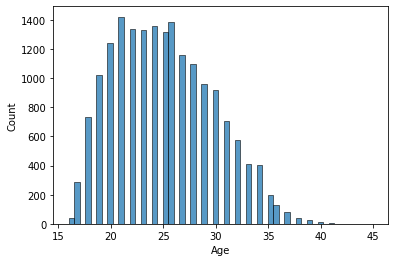

In [79]:
sns.histplot(data.Age)

**MOST OF THE PLAYERS' AGE RANGE FROM 20-26.**

In [38]:
print("Age of the oldest player is ", np.max(data["Age"]))
print("Age of the youngest player is ", np.min(data["Age"]))

Age of the oldest player is  45
Age of the youngest player is  16


**OLDEST PLAYER**

In [39]:
data.loc[data["Age"]==data["Age"].max()]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
4741,O. Pérez,45,Mexico,71,71,Pachuca,160.0,8.0,Right,2.0,1.0,GK,1991,2021-01-01,5.666667,165.0,272.0


**O Perez is the oldest player.**

**YOUNGER PLAYERS**

In [40]:
data.loc[data["Age"]==data["Age"].min()]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
11457,W. Geubbels,16,France,64,86,AS Monaco,1000.0,5.0,Right,1.0,3.0,ST,2018,2023-01-01,6.083333,159.0,2900.000000
11732,A. Taoui,16,France,64,75,Toulouse Football Club,700.0,3.0,Left,1.0,3.0,ST,2018,2021-01-01,5.833333,152.0,1500.000000
12496,Pelayo Morilla,16,Spain,63,81,Real Sporting de Gijón,725.0,1.0,Left,1.0,3.0,RM,2018,2022-01-01,6.000000,154.0,1600.000000
12828,Guerrero,16,Spain,63,76,CF Rayo Majadahonda,625.0,1.0,Left,1.0,3.0,CM,2018,2019-01-01,5.916667,165.0,1400.000000
13293,H. Massengo,16,France,62,75,AS Monaco,450.0,2.0,Right,1.0,2.0,CDM,2018,2021-01-01,5.833333,146.0,1100.000000
13567,Y. Verschaeren,16,Belgium,62,83,RSC Anderlecht,650.0,1.0,Right,1.0,3.0,CAM,2017,2021-01-01,5.666667,139.0,1600.000000
15363,Y. Roemer,16,Netherlands,59,75,VVV-Venlo,300.0,1.0,Right,1.0,3.0,ST,2018,2019-01-01,5.916667,154.0,623.000000
15746,Y. Begraoui,16,France,59,81,AJ Auxerre,350.0,1.0,Right,1.0,2.0,ST,2018,2019-01-01,5.750000,137.0,980.000000
15793,J. Lahne,16,Sweden,59,77,IF Brommapojkarna,300.0,1.0,Right,1.0,2.0,ST,2017,2020-01-01,5.583333,150.0,563.000000
16081,J. Italiano,16,Australia,58,79,Perth Glory,280.0,1.0,Right,1.0,3.0,LM,2017,2019-01-01,5.583333,143.0,630.000000


**ALTHOUGH THE OVERALL SCORE OF YONUG PLAYERS ARE AVERAGE ; BUT THEY HAVE GREAT POTENTIAL.**

<Figure size 1152x1152 with 0 Axes>

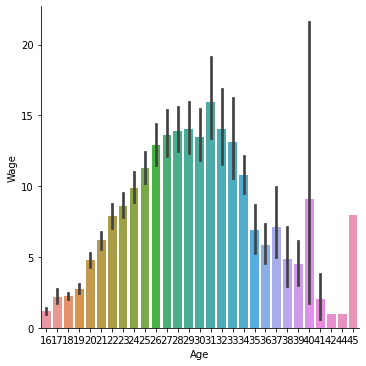

In [92]:
sns.catplot(x="Age",y="Wage",data=data,kind="bar")

**PLAYERS BETWEEN 25-34 YEARS OF AGE HAVE HIGHER WAGE.**

### **ANALYSIS BY POSITIONS**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

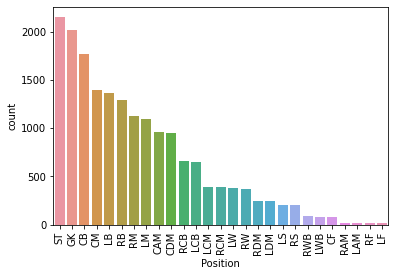

In [108]:
sns.countplot(x=data["Position"],data=data,order=data["Position"].value_counts().index)
plt.xticks(rotation=90)

**MOST PLAYERS PLAY AT ST FOLLOWED BY GK,CB AND SO ON.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

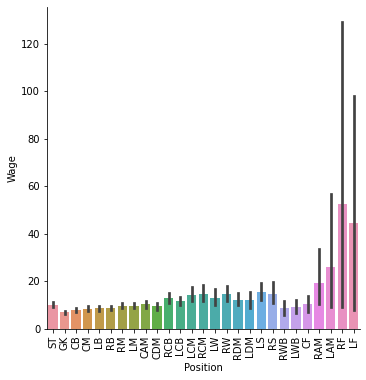

In [115]:
sns.catplot(x="Position",y="Wage",data=data, kind="bar",order=data["Position"].value_counts().index)
plt.xticks(rotation=90)

**PLAYERS PLAYING AT LESS COMMON POSITIONS SUCH AS LF,RF ARE GETTING HIGHER WAGES.**

### **EFFECT OF PREFERRED FOOT**

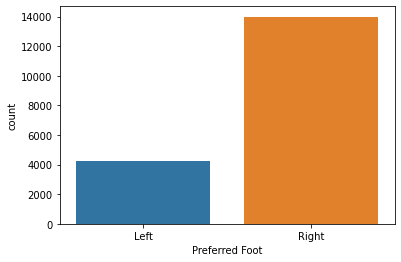

In [30]:
sns.countplot(x=data["Preferred Foot"],data=data)

**MOST NO. OF PLAYERS PREFER RIGHT FOOT**

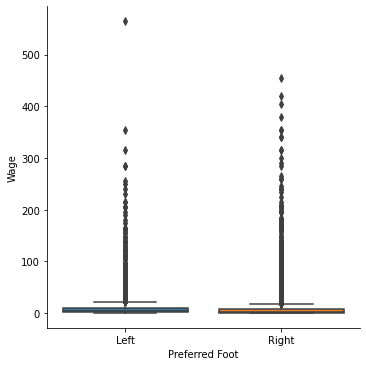

In [70]:
sns.catplot(x="Preferred Foot",y="Wage",kind="box",data=data)

**THE AWAY POINT INDICATES OUTLIERS.**


**FROM THE GRAPH, WE CAN SAY THAT PREFERRED FOOT DOES NOT AFFECT THE WAGE MUCH.**

### **EFFECT OF VALUE**

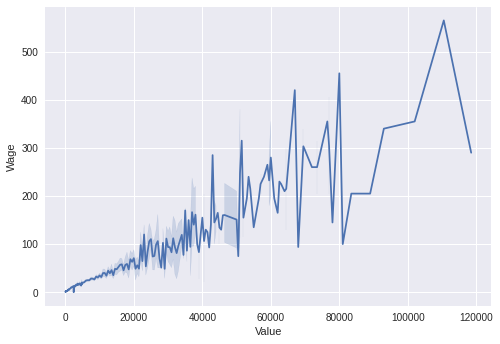

In [155]:
sns.lineplot(x="Value",y="Wage",data=data)

**IN THE PLOT, WAGES SEEM TO GO HIGHER WITH VALUE;BUT TREND IS NOT UNIFORM AND KEEPS CHANGING.**

## **CONCLUSION**

### **FROM THE DETAILED ANALYSIS WE CAN CONCLUDE THAT,**

 **ENGLAND HAS HIGHEST NUMBER OF PLAYERS.**

 **LIONEL MESSI & CRISTIANO RONALDO HAVE HIGHEST OVERALL RATING, WHILE L MESSI IS HIGHEST PAID PLAYER.**

**MORE NUMBER OF PLAYERS PREFERRED THEIR RIGHT FOOT.**

**THE WAGE OF A PLAYER IS HIGHLY AFFECTED BY THE CLUB HE PLAYS FOR.**

**THE WAGE ALSO AFFECTED BY NATIONALITY,POSITIONS,AGE,OVERALL & POTENTIAL RANKING.**


# **THANK YOU !**